# Aula 2 - Manipulação de Imagens

In [1]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Transformação Afim - Deslocando a imagem

In [2]:
image = cv2.imread("imagens/robot.jpg")
height, width = image.shape[:2]
new_height, new_width = height/4, width/4
T = np.float32([[1, 0, new_width],[0, 1, new_height]])
print(T)
image_translation = cv2.warpAffine(image, T, (width, height))
cv2.imshow("Robot Translation", image_translation)
cv2.waitKey()
cv2.destroyAllWindows()

[[   1.     0.   134.5]
 [   0.     1.   134.5]]


### Rotação da Imagem

In [3]:
image = cv2.imread("imagens/robot.jpg")
height, width = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
image_rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
cv2.imshow("Robot Rotation", image_rotated)
cv2.waitKey()
cv2.destroyAllWindows()

### Rotação por Matriz Transposta

In [4]:
image_transposed = cv2.transpose(image)
cv2.imshow("Robot Rotation Transpose", image_transposed)
cv2.waitKey()
cv2.destroyAllWindows()

### Interpolação

In [5]:
image = cv2.imread("imagens/coffee_small.jpg")
# Vezes que aumenta a imagem
factor_x=5 # Escala de X
factor_y=5 # Escala de Y
# Tipos e Interpolação
image_scaled_linear = cv2.resize(image, None, fx=factor_x, fy=factor_y)
image_scaled_cubic = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_CUBIC)
image_scaled_area = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_AREA)
image_scaled_lanczo = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_LANCZOS4)
# Visualização
cv2.imshow("Coffee Original", image)
cv2.imshow("Coffee Scaled Linear", image_scaled_linear)
cv2.imshow("Coffee Scaled Cubic", image_scaled_cubic)
cv2.imshow("Coffee Scaled Inter Area", image_scaled_area)
cv2.imshow("Coffee Scaled Lanczo", image_scaled_lanczo)
cv2.waitKey()
cv2.destroyAllWindows()

### Redimencionamento

In [6]:
new_scale = (200,200) # Escala da imagem, em pixels
image_scaled_linear = cv2.resize(image, new_scale)
image_scaled_cubic = cv2.resize(image, new_scale, interpolation=cv2.INTER_CUBIC)
image_scaled_area = cv2.resize(image, new_scale, interpolation=cv2.INTER_AREA)
image_scaled_lanczo = cv2.resize(image, new_scale, interpolation=cv2.INTER_LANCZOS4)

cv2.imshow("Coffee Scaled Linear", image_scaled_linear)
cv2.imshow("Coffee Scaled Cubic", image_scaled_cubic)
cv2.imshow("Coffee Scaled Inter Area", image_scaled_area)
cv2.imshow("Coffee Scaled Lanczo", image_scaled_lanczo)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# Corta imagem na metade, para baixo
image = cv2.imread("imagens/robot.jpg")

image_small = cv2.pyrDown(image)
image_smaller = cv2.pyrDown(image_small)

cv2.imshow("Robot", image)
cv2.imshow("Robot Small", image_small)
cv2.imshow("Robot Smaller", image_smaller)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# Aumenta imagem, pelo dobro
image = cv2.imread("imagens/coffee_small.jpg")

image_small = cv2.pyrUp(image)
image_smaller = cv2.pyrUp(image_small)

cv2.imshow("Robot", image)
cv2.imshow("Robot Small", image_small)
cv2.imshow("Robot Smaller", image_smaller)
cv2.waitKey()
cv2.destroyAllWindows()

### Transformação Homográfica (Colineariadade)

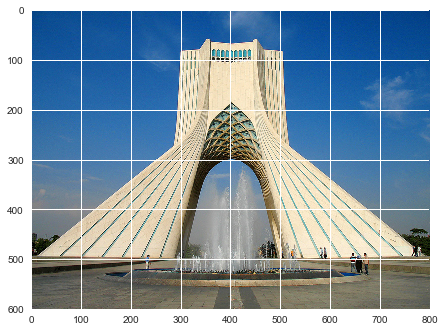

In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('seaborn')

# Abrindo imagem
image = cv2.imread("imagens/portal.png")
image_plt = mpimg.imread("imagens/portal.png")
plt.imshow(image_plt)
plt.show()

600 800


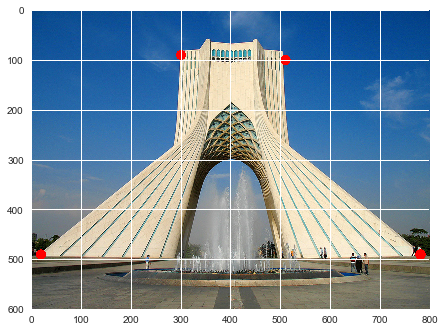

In [10]:
# Pega a resolução da foto
height, width = image.shape[:2]
# Cria uma cópia
image_marker = image.copy()
print(height, width)

# Cor
color = (0, 0, 255)

# Coloca os pontos na imagem
cv2.circle(image_marker, (300,90), 5, color, 10) # Imagem, Coordenada (X,Y), Raio, cor, tamanho do ponto
cv2.circle(image_marker, (510,100), 5, color, 10)
cv2.circle(image_marker, (20,490), 5, color, 10)
cv2.circle(image_marker, (780,490), 5, color, 10)

cv2.imwrite("portal_processing.png", image_marker)
image_plt = mpimg.imread("portal_processing.png")
plt.imshow(image_plt)
plt.show()

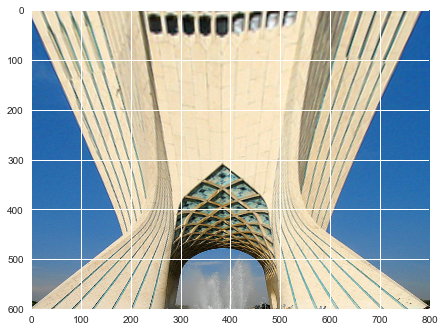

In [11]:
# Seleciona os pontos, nas mesmas coordenadas dos pontinhos
pts1_marker = np.float32([[300,90],[510,100],[20,490],[780,490]])

# Seleciona os limites que a imagem deve esticar
pts2_strech = np.float32([[0,0],[800,0],[0,600],[800,600]])

# Transforma a persepctiva
M = cv2.getPerspectiveTransform(pts1_marker, pts2_strech)
dst = cv2.warpPerspective(image,M,(800,600))

cv2.imwrite("portal_perspective.png", dst)
image_plt = mpimg.imread("portal_perspective.png")
plt.imshow(image_plt)
plt.show()

## Desafio 1


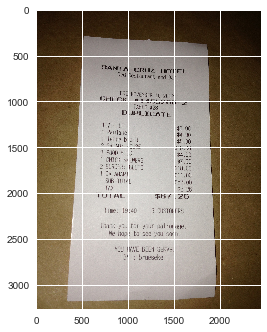

In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('seaborn')

# Abrindo imagem
cupom = cv2.imread("imagens/cupom.png")
image_plt = mpimg.imread("imagens/cupom.png")
plt.imshow(image_plt)
plt.show()

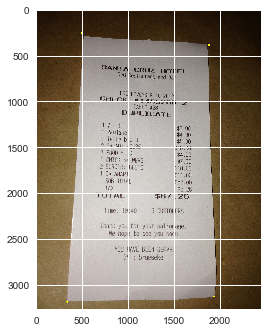

In [13]:
# Pega a resolução da foto
height, width = cupom.shape[:2]

# Cor
color = (0, 255, 255)

# Coloca os pontos na imagem
cv2.circle(cupom, (500, 250), 5, color, 10)
cv2.circle(cupom, (1880, 380), 5, color, 10)
cv2.circle(cupom, (340, 3185), 5, color, 10)
cv2.circle(cupom, (1938, 3126), 5, color, 10)

cv2.imwrite("cupom_processing.png", cupom)
image_plt = mpimg.imread("cupom_processing.png")
plt.imshow(image_plt)
plt.show()

In [14]:
height, width

(3264, 2448)

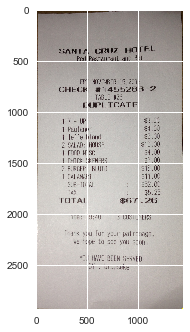

In [15]:
# Seleciona os pontos, nas mesmas coordenadas dos pontinhos
pts1_marker = np.float32([[500,250],[1880,380],[340,3185],[1938,3126]])

# Seleciona os limites que a imagem deve esticar
pts2_strech = np.float32([[0,0],[1438,0],[0,2935],[1438,2935]])

# Transforma a persepctiva
M = cv2.getPerspectiveTransform(pts1_marker, pts2_strech)
cupom_final = cv2.warpPerspective(cupom,M,(1438,2935))

cv2.imwrite("cupom_final.png", cupom_final)
image_plt = mpimg.imread("cupom_final.png")
plt.imshow(image_plt)
plt.show()

### Recorte de Imagem

In [16]:
image = cv2.imread("imagens/robot.jpg")
height, width = image.shape[:2]
start_row, start_col = int(height*0.3), int(width*0.3)
end_row, end_col = int(height*0.6), int(width*0.6)
image_crop = image[start_row:end_row, start_col:end_col] # Utilizando de Slice Notation
cv2.imshow("Robot Cropped", image_crop)
cv2.waitKey()
cv2.destroyAllWindows()

### Alterando Brilho

In [17]:
# Escala RBG: 0 mais escuro, 255 mais claro
image = cv2.imread("imagens/robot.jpg")
image_shape = image.shape

bright_M = np.ones(image_shape, np.uint8) * 100 # Cria matriz com vários 1
image_bright = cv2.add(image, bright_M) # Adicionando Brilho

cv2.imshow("Robot Bright", image_bright)
cv2.waitKey()

image_dark = cv2.subtract(image, bright_M) # Retirando Brilho
cv2.imshow("Robot Dark", image_dark)

cv2.waitKey()
cv2.destroyAllWindows()

### Operações Lógicas com Imagens

In [18]:
# Intersecção

# Retangulo branco
rectangle = np.zeros((300,300), np.uint8) 
cv2.rectangle(rectangle, (50,50), (200,200), 255, -2)
cv2.imshow("Retangule", rectangle)
cv2.waitKey()

# Circulo Branco
circle = np.zeros((300,300), np.uint8)
cv2.circle(circle,(180,150), 100, 255, -2)
cv2.imshow("Circle", circle)
cv2.waitKey()

# Intersecção 
and_operation = cv2.bitwise_and(rectangle, circle)
cv2.imshow("And Operation", and_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
# Junção

#Retangulo branco
rectangle = np.zeros((300,300), np.uint8)
cv2.rectangle(rectangle, (50,50), (200,200), 255, -2)
cv2.imshow("Retangule", rectangle)
cv2.waitKey()

# Circulo Branco
circle = np.zeros((300,300), np.uint8)
cv2.circle(circle,(180,150), 100, 255, -2)
cv2.imshow("Circle", circle)
cv2.waitKey()

# Junção
or_operation = cv2.bitwise_or(rectangle, circle)
cv2.imshow("Or Operation", or_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
# Menos a diferença

#Retangulo branco
rectangle = np.zeros((300,300), np.uint8)
cv2.rectangle(rectangle, (50,50), (200,200), 255, -2)
cv2.imshow("Retangule", rectangle)
cv2.waitKey()

# Circulo Branco
circle = np.zeros((300,300), np.uint8)
cv2.circle(circle,(180,150), 100, 255, -2)
cv2.imshow("Circle", circle)
cv2.waitKey()

# Diferença
xor_operation = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("Xor Operation", xor_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
# Inversão

#Retangulo branco
rectangle = np.zeros((300,300), np.uint8)
cv2.rectangle(rectangle, (50,50), (200,200), 255, -2)
cv2.imshow("Retangule", rectangle)
cv2.waitKey()

# Circulo Branco
circle = np.zeros((300,300), np.uint8)
cv2.circle(circle,(180,150), 100, 255, -2)
cv2.imshow("Circle", circle)
cv2.waitKey()

# Negação
not_operation = cv2.bitwise_not(circle)
cv2.imshow("Not Operation", not_operation)
cv2.waitKey()
cv2.destroyAllWindows()

## Desafio 2 
Dado a imagem abaixo (no repositório “imagens/gize.png”), realize a extração da pirâmide, por meio de uma máscara poligonal, para uma outra imagem com fundo na cor verde.

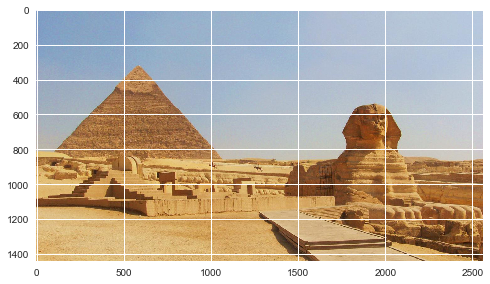

In [22]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('seaborn')

# Abrindo imagem
gize = cv2.imread("imagens/gize.png")
image_plt = mpimg.imread("imagens/gize.png")
plt.imshow(image_plt)
plt.show()

In [33]:
# Resize
factor_x=0.2 # Escala de X
factor_y=0.2 # Escala de Y

# Tipos e Interpolação
gize_resize = cv2.resize(gize, None, fx=factor_x, fy=factor_y)

# Pega a resolução da foto
height, width = gize_resize.shape[:2]

cv2.imwrite("gize_resize.png", gize_resize)
gize_resize = cv2.imread("imagens/gize_resize.png")

# Criando mascara
mask = np.zeros((height, width), dtype=np.uint8)
pts = np.array([[116, 65], [22,162], [210, 170]])
cv2.fillPoly(mask, [pts], (0, 255, 255))

height, width

(288, 512)

In [34]:
# Visalizando a mascara
cv2.imshow("Mask", mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
# Cor
color = (0, 255, 255)

# Coloca os pontos na imagem
cv2.circle(gize_resize, (116, 65), 1, color, 5)
cv2.circle(gize_resize, (22, 162), 1, color, 5)
cv2.circle(gize_resize, (210, 170), 1, color, 5)

# Intersecção 
and_operation = cv2.bitwise_and(rectangle, circle)
cv2.imshow("And Operation", and_operation)
cv2.waitKey()
cv2.destroyAllWindows()

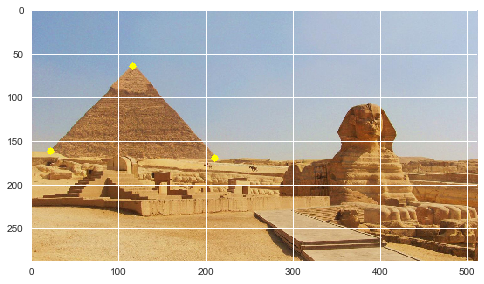

In [26]:
# View
cv2.imwrite("gize_resize_processing.png", gize_resize)
image_plt = mpimg.imread("gize_resize_processing.png")
plt.imshow(image_plt)
plt.show()